# Step - 1 : Busniness Problem Understanding

- **To conduct a comprehensive analysis of blinkit's Sales data performance, customer satisfaction and inventory distribution to identify key insights and opportunities for optimization using various KPI ( Key Performance Indicator ).**

1. **Total Sales : The overall revenue generated from all items sold.**

2. **Average Sales : The average revenue per sales.**

3. **No.of items : The total count of different items sold.**

4. **Average Rating : The average customers rating for items sold.**

  

**Objective**
- Analyze the impact of fat content on total sales
- Identify the performance of different item types in term of the total sales
- Compare total sales accross different outlets
- Evaluate how age ot type pf outlet establishment
- correlation between outlet size and total sales
- Geographical distribution of sales across different location 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("BlinkIT Grocery Data.xlsx")
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


# Step - 2 : Data Understanding 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- **Observation :**
1. The dataset contains 8,523 rows and 12 columns. Here is a summary of the columns.
2. The column Item Weight has missing values.
3. We have 7 ( Object ) Datatype, 1 ( int ) datatype, 4 ( float ) datatypes.


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
# Listing the columns by Continuous, Discrete Categotical, discrete count 
continous = ['Sales','Item Visibility','Item Weight',"Rating"]

discrete_count = ["Outlet Establishment Year"]

discrete_categorical = ['Item Fat Content', 'Item Identifier','Item Type', 'Outlet Location Type', 'Outlet Size', 'Outlet Type','Outlet Identifier']


- **Note :**
1. Taking rating as continous varibale as it has float values

# Data Exploration Analysis

In [7]:
df[continous].describe()

,Sales,Item Visibility,Item Weight,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000
mean,140.992783,0.066132,12.857645,3.965857
std,62.275067,0.051598,4.643456,0.605651
min,31.290000,0.000000,4.555000,1.000000
25%,93.826500,0.026989,8.773750,4.000000
50%,143.012800,0.053931,12.600000,4.000000
75%,185.643700,0.094585,16.850000,4.200000
max,266.888400,0.328391,21.350000,5.000000


In [8]:
df[discrete_count].describe()

,Outlet Establishment Year
count,8523.000000
mean,2016.450546
std,3.189396
min,2011.000000
25%,2014.000000
50%,2016.000000
75%,2018.000000
max,2022.000000


In [9]:
for i in discrete_categorical:
    print("\n",i,' the unique values are:' ,df[i].unique())
    print(i,'the value count are:',df[i].value_counts())
    print("=====================================================================")
    


 Item Fat Content  the unique values are: ['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
Item Fat Content the value count are: Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

 Item Identifier  the unique values are: ['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52']
Item Identifier the value count are: Item Identifier
FDW13    10
FDG33    10
FDF56     9
FDF52     9
FDV38     9
         ..
FDK57     1
FDO33     1
DRF48     1
FDC23     1
FDE52     1
Name: count, Length: 1559, dtype: int64

 Item Type  the unique values are: ['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']
Item Type the value count are: Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                 

- *Observation :*
    - **Grocery stores** specialize in food and drinks but sell a small selection of household products, as well.
    -  While food and drinks remain central to **Supermarkets**, these stores devote more shelf space to other items than grocery stores.

**-> checking for wrong data ( miss spelled values / wrong entry data )**

In [10]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

**Note:**
- We have miss spelled values so clean them

**-> Checking for wrong datatype**

In [11]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

**Note :**
- No Wrong datatype present 

**-> Checking for missing values**

In [12]:
# Checking for missing values across all columns
missing_values = df.isnull().sum()
missing_values

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

**Observation :**
- *Missing valuesa are avaliable in Item Weight, cleaning should be done* 

**-> Checking for Duplicate values**

In [13]:
df.duplicated().sum()

0

**Note :**
- No duplicate values avaliable.

# **Plots**
  - **Continuous Variable**  

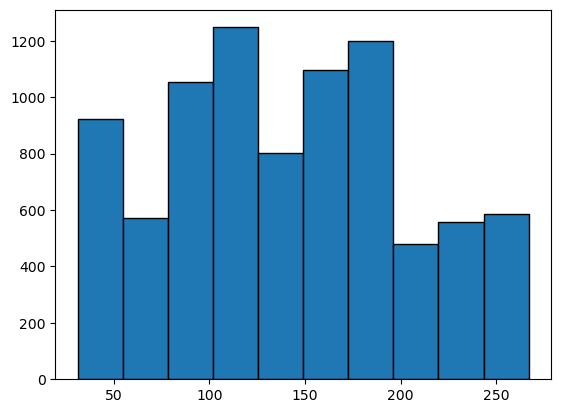

In [14]:
plt.hist(df["Sales"],edgecolor = "Black")
plt.show()

# **Observations :**
- *Sales*
    -  If the histogram is right-skewed, it indicates that most items have low sales, with a few high-performing items.
    -  A normal distribution suggests balanced sales performance across all items.  

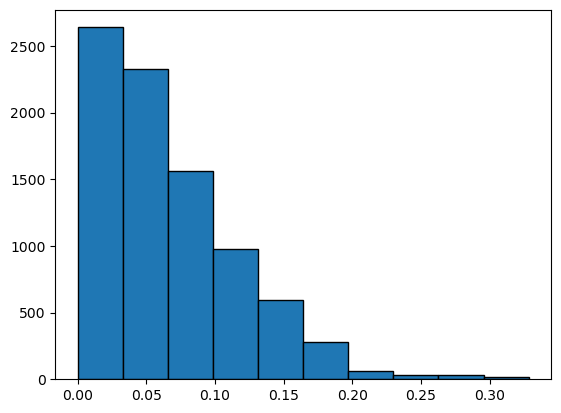

In [15]:
plt.hist(df['Item Visibility'],edgecolor = "Black")
plt.show()

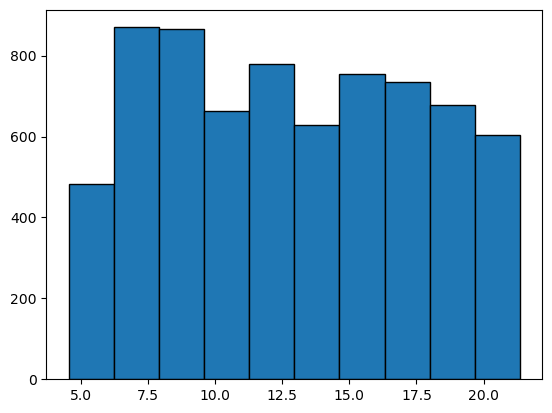

In [16]:
plt.hist(df['Item Weight'],edgecolor = "Black")
plt.show()

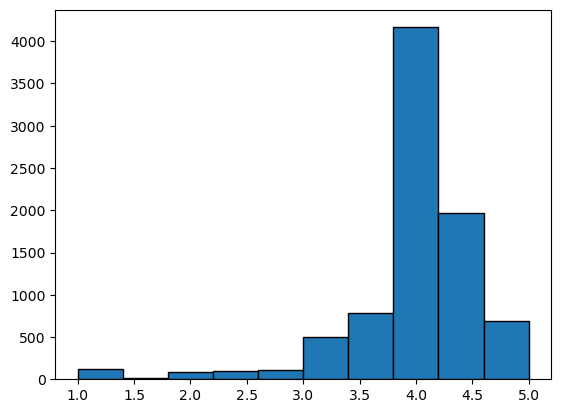

In [17]:
plt.hist(df['Rating'],edgecolor = "Black")
plt.show()

In [18]:
df[continous].skew()

Sales              0.127202
Item Visibility    1.167090
Item Weight        0.082426
Rating            -2.188976
dtype: float64

In [19]:
df[continous].mean()

Sales              140.992783
Item Visibility      0.066132
Item Weight         12.857645
Rating               3.965857
dtype: float64

In [20]:
df[continous].median()

Sales              143.012800
Item Visibility      0.053931
Item Weight         12.600000
Rating               4.000000
dtype: float64

# *Boxplot plots*

Text(0.5, 1.0, 'Sales')

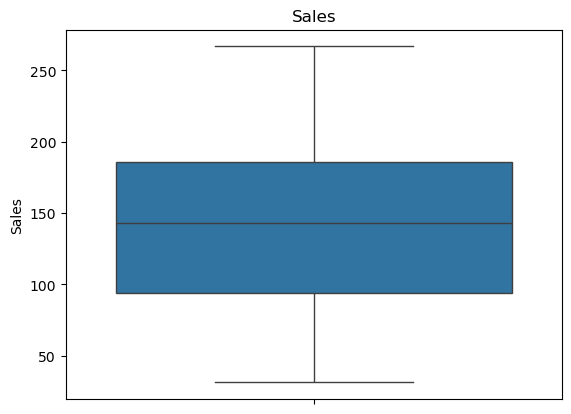

In [21]:
sns.boxplot(df["Sales"])
plt.title("Sales")

Text(0.5, 1.0, 'Item Weight')

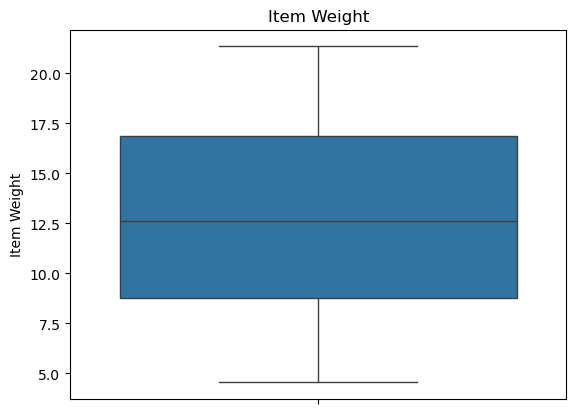

In [22]:
sns.boxplot(df["Item Weight"])
plt.title("Item Weight")

Text(0.5, 1.0, 'Item Visibility')

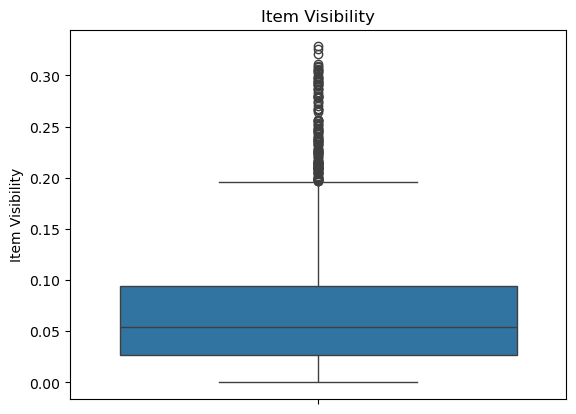

In [23]:
sns.boxplot(df['Item Visibility'])
plt.title("Item Visibility")

Text(0.5, 1.0, 'Rating')

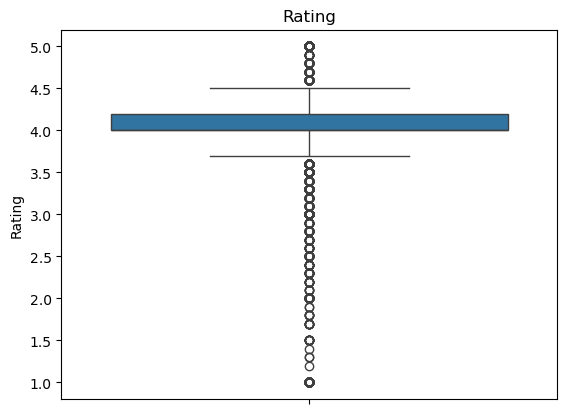

In [24]:
sns.boxplot(df["Rating"])
plt.title("Rating")

- **Observation :** 
    - we observe that there are outliers present in Item Visibility and Rating.

- **Discrete count variable plot**

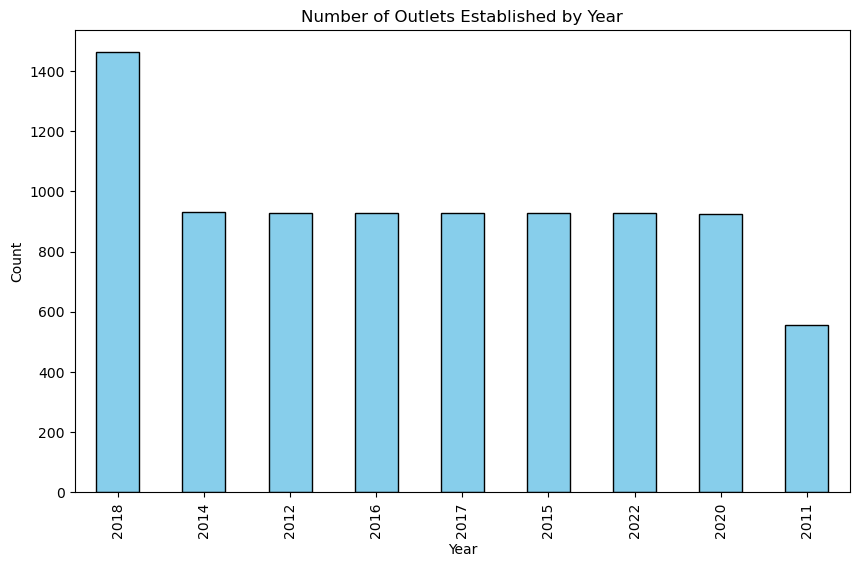

In [25]:
df['Outlet Establishment Year'].value_counts().plot(
    kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Number of Outlets Established by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


 **Note :**
- **Bar Plot: If you want a clear view of how many outlets were established each year.**
- **We can see that more no.of outlets are established in the year 2018.**

- **Pie chart**

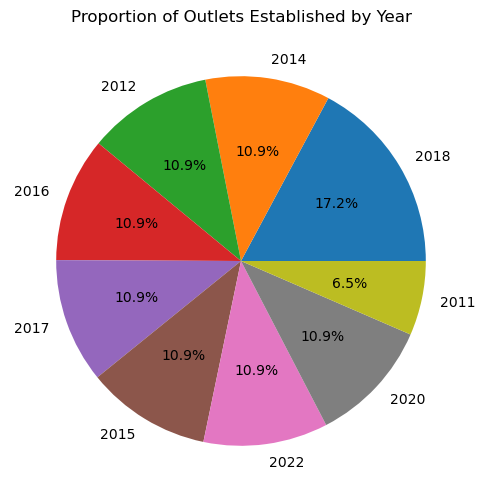

In [26]:
import matplotlib.pyplot as plt

# Count the number of outlets established in each year
outlet_counts = df['Outlet Establishment Year'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(outlet_counts,
    labels=outlet_counts.index,
    autopct='%1.1f%%')    
plt.title('Proportion of Outlets Established by Year')
plt.show()


# Observation :
- we can see year 2018 is having the highest percentage i.e 17.2%, compared to all other years. 

# Step - 3 Data Preprocessing 

**Data Cleaning**
1. Wrong_data
2. Wrong datatypes
3. Missing values
4. Duplicates
5. Outliers

**Note**
- There are no wrong datatypes and Duplicate types.

**1. Wrong Data**

**Wrong data in Item Fat Content Column**

In [27]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

**Note :**
- The distinct categories for "Item Fat Content" are essentially just "Regular" and "Low Fat"; the variations like "low fat" and "LF" are simply different ways of writing the same category "Low Fat" which indicates a lower fat content compared to "Regular". 

**Key Points :**
- "Regular": Represents a standard, non-reduced fat item.
- "Low Fat": Indicates a product with significantly less fat than the "Regular" version.

**Replace the data** 

In [28]:
df["Item Fat Content"] = df["Item Fat Content"].replace('low fat', 'Low Fat')
df["Item Fat Content"] = df["Item Fat Content"].replace('LF', 'Low Fat')
df["Item Fat Content"] = df["Item Fat Content"].replace('reg', 'Regular')

In [29]:
# Checking the that it has replaced the old values to new values
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

**Observatiom**
- Replaced miss spelled values with "Regular" and "Low Fat" 

**2.Wrong Datatypes**

In [30]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

**Observation :**
- NO wrong datatype

**3. Missing Values**
- *we have missing values*

**Checking the percentage of missing values**

In [31]:
df.isnull().sum()/len(df)*100

Item Fat Content              0.000000
Item Identifier               0.000000
Item Type                     0.000000
Outlet Establishment Year     0.000000
Outlet Identifier             0.000000
Outlet Location Type          0.000000
Outlet Size                   0.000000
Outlet Type                   0.000000
Item Visibility               0.000000
Item Weight                  17.165317
Sales                         0.000000
Rating                        0.000000
dtype: float64

**Note :**
- *Missing values are less than 30 %, so we don't drop the columns*
- *Replace with median value.*

**We use .fillna( ) to fill the missing values with median**

In [32]:
df["Item Weight"] = df["Item Weight"].fillna(df["Item Weight"].median())
df["Item Weight"]

0       15.10
1       11.80
2       13.85
3       12.15
4       19.60
        ...  
8518    12.60
8519    12.60
8520    12.60
8521    12.60
8522    12.60
Name: Item Weight, Length: 8523, dtype: float64

- **Checking for the missing values are replaced** 

In [33]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

**Observation :**
- There are no missing values, we have replaced then with median.

**4. Duplicate values**

In [34]:
df.duplicated().sum()

0

**Observation :**
- No Duplicate values.

**5. Outliers** 
- We have identified there are outliers present in Item Visibility and Rating.

<Axes: ylabel='Item Visibility'>

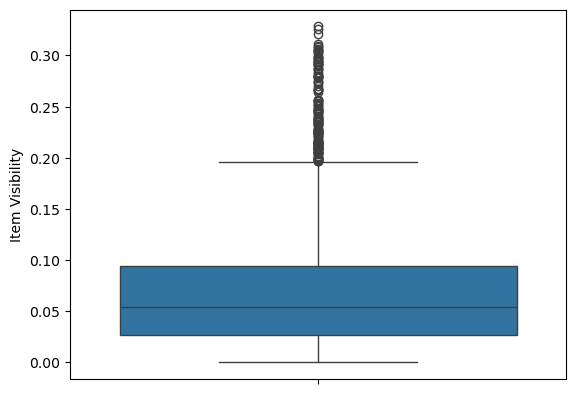

In [35]:
sns.boxplot(df["Item Visibility"])

In [36]:
# Item visibility

# Calculation of q1 and q3 values
q1 = df["Item Visibility"].quantile(0.25)
print(f"q1 value is:{q1}")
q3 = df["Item Visibility"].quantile(0.75)
print(f"q3 value is:{q3}")

# Calculation of IRQ
IQR = q3 -q1
print(f'IQR value is:{IQR}')

# Calculating the lower limit and upper limit
lower_l = q1-(1.5*IQR)
upper_l = q3+(1.5*IQR)
print(f'lower_l value is:{lower_l}')
print(f'upper_l value is:{upper_l}')



q1 value is:0.0269894775
q3 value is:0.0945852925
IQR value is:0.067595815
lower_l value is:-0.07440424500000001
upper_l value is:0.195979015


**Observation**
- Item Visibility:
    - Number of Outliers: 144
    - Lower Bound: -0.0744
    - Upper Bound: 0.1960

**Outliers Data**

In [37]:
outliers = df[(df["Item Visibility"]<lower_l) | (df["Item Visibility"]>upper_l)]
outliers

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
92,Low Fat,FDK02,Canned,2018,OUT019,Tier 1,Small,Grocery Store,0.196491,12.60,120.5440,5.0
93,Low Fat,FDI15,Dairy,2018,OUT019,Tier 1,Small,Grocery Store,0.247490,12.60,263.1884,5.0
109,Regular,FDF56,Fruits and Vegetables,2018,OUT019,Tier 1,Small,Grocery Store,0.209163,12.60,179.1976,5.0
294,Low Fat,FDR48,Baking Goods,2011,OUT010,Tier 3,Medium,Grocery Store,0.220111,11.65,153.0024,5.0
302,Low Fat,NCN06,Household,2011,OUT010,Tier 3,Medium,Grocery Store,0.201688,8.39,162.8868,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Regular,FDU27,Meat,2011,OUT010,Tier 3,High,Grocery Store,0.287017,18.60,48.8376,4.0
7716,Regular,DRA59,Soft Drinks,2011,OUT010,Tier 3,Small,Grocery Store,0.214125,8.27,183.9924,4.0
7719,Regular,FDD47,Starchy Foods,2011,OUT010,Tier 3,Small,Grocery Store,0.238366,7.60,171.8448,4.0
7720,Regular,FDH47,Starchy Foods,2011,OUT010,Tier 3,Small,Grocery Store,0.215612,13.50,98.6068,4.0


In [38]:
# extracting the outliers
print("outlier below lower_limit:",len(df[df["Item Visibility"]< lower_l]))
print("outlier below upper_limit:",len(df[df["Item Visibility"]< upper_l]))


outlier below lower_limit: 0
outlier below upper_limit: 8379


<Axes: ylabel='Rating'>

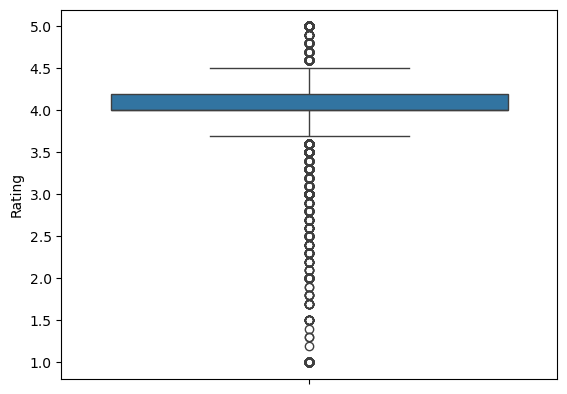

In [39]:
sns.boxplot(df["Rating"])


In [40]:
# Rating

# Calculation of q1 and q3 values
q1 = df["Rating"].quantile(0.25)
print(f"q1 value is:{q1}")
q3 = df["Rating"].quantile(0.75)
print(f"q3 value is:{q3}")

# Calculation of IRQ
IQR = q3 -q1
print(f'IQR value is:{IQR}')

# Calculating the lower limit and upper limit
lower_l = q1-(1.5*IQR)
upper_l = q3+(1.5*IQR)
print(f'lower_l value is:{lower_l}')
print(f'upper_l value is:{upper_l}')



q1 value is:4.0
q3 value is:4.2
IQR value is:0.20000000000000018
lower_l value is:3.6999999999999997
upper_l value is:4.5


**Observation**
- Rating:
    - Number of Outliers: 1931
    - Lower Bound: 3.7
    - Upper Bound: 4.5

**Outliers Data**

In [41]:
outliers = df[(df["Rating"]<lower_l) | (df["Rating"]>upper_l)]
outliers

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5834,Low Fat,FDR21,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.066611,12.60,178.2370,1.0
5835,Regular,FDR59,Breads,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.063554,12.60,263.6594,1.0
5836,Regular,FDX04,Frozen Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.041370,12.60,46.2376,1.0
5837,Regular,FDK20,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.60,120.5072,1.0


# Excel File Cleaned

In [42]:
df.to_excel("Blinkit_Cleaned_data.xlsx")

# Step - 4 Anaylsis 

**Creating new columns for the analysis**
1. Total Sales: Overall revenue from all items.
2. Average Sales: Average revenue per sale.
3. Number of Items: Total count of unique items sold.
4. Average Rating: Average customer rating for all items.

In [43]:
# Calculate the required columns
total_sales = df['Sales'].sum()
average_sales = df['Sales'].mean()
number_of_items = df['Item Identifier'].nunique()
average_rating = df['Rating'].mean()

# Create a summary DataFrame for these metrics
summary_df = pd.DataFrame({
    'Metric': ['Total Sales', 'Average Sales', 'Number of Items', 'Average Rating'],
    'Value': [total_sales, average_sales, number_of_items, average_rating]
})

summary_df


# Add summary statistics as new columns
#df['Total Sales'] = total_sales
#df['Average Sales'] = average_sales
#df['Number of Items'] = number_of_items
#df['Average Rating'] = average_rating


,Metric,Value
0,Total Sales,1.201681e+06
1,Average Sales,1.409928e+02
2,Number of Items,1.559000e+03
3,Average Rating,3.965857e+00


In [44]:
# Convert the values to integers where applicable
summary_df['Value'] = summary_df['Value'].astype(int)

summary_df


,Metric,Value
0,Total Sales,1201681
1,Average Sales,140
2,Number of Items,1559
3,Average Rating,3


**Observation :**
Here are the calculated metrics:

- *Total Sales: ₹1,201,681.00*
- *Average Sales: ₹140.99*
- *Number of Items: 1,559 unique items sold*
- *Average Rating: 3.97*

# Objectives 

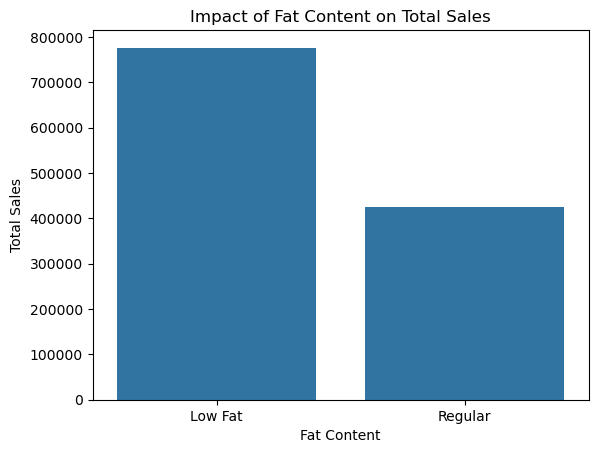

In [45]:

# 1. Impact of Fat Content on Total Sales

# Add Outlet Age column
current_year = 2025
df['Outlet Age'] = current_year - df['Outlet Establishment Year']

fat_content_sales = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
sns.barplot(data=fat_content_sales, x='Item Fat Content', y='Sales')
plt.title('Impact of Fat Content on Total Sales')
plt.xlabel('Fat Content')
plt.ylabel('Total Sales')
plt.show()


**Note :**
    - **This calculation determines the age of each outlet, which could help in analyzing trends or relationships between outlet age and other factors like sales, location, or customer preferences.**

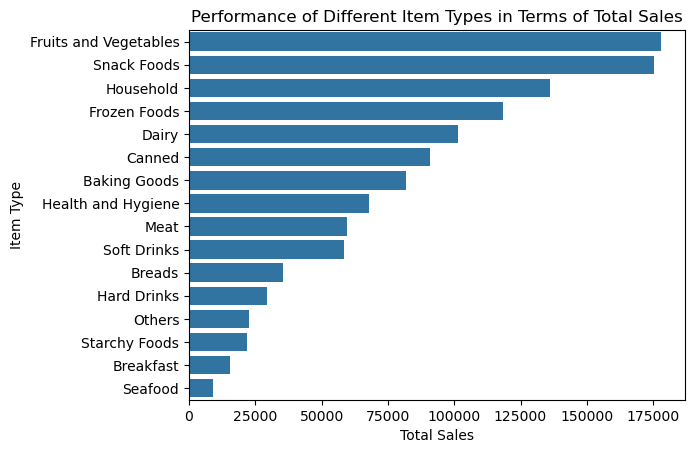

In [46]:
# 2. Performance of Different Item Types in Terms of Total Sales

item_type_sales = df.groupby('Item Type')['Sales'].sum().reset_index()
item_type_sales = item_type_sales.sort_values('Sales', ascending=False)
sns.barplot(data=item_type_sales, x='Sales', y='Item Type')
plt.title('Performance of Different Item Types in Terms of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.show()


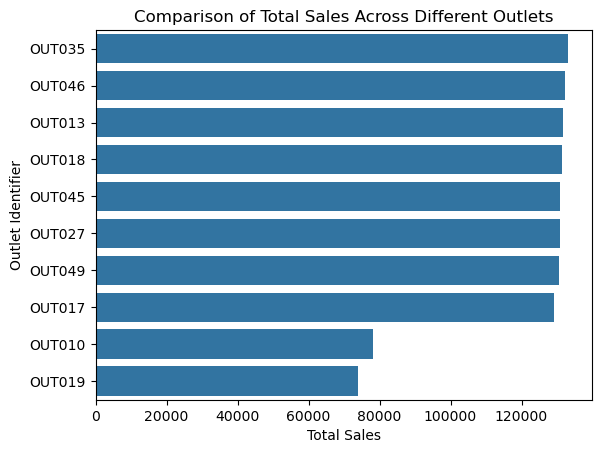

In [47]:
# 3. Comparison of Total Sales Across Different Outlets

outlet_sales = df.groupby('Outlet Identifier')['Sales'].sum().reset_index()
outlet_sales = outlet_sales.sort_values('Sales', ascending=False)
sns.barplot(data=outlet_sales, x='Sales', y='Outlet Identifier')
plt.title('Comparison of Total Sales Across Different Outlets')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Identifier')
plt.show()


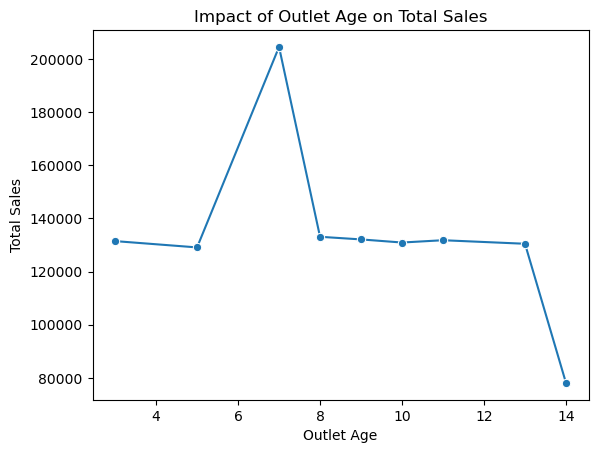

In [48]:
# 4. Evaluation of Age of Outlet Establishment on Sales

outlet_age_sales = df.groupby('Outlet Age')['Sales'].sum().reset_index()
sns.lineplot(data=outlet_age_sales, x='Outlet Age', y='Sales', marker='o')
plt.title('Impact of Outlet Age on Total Sales')
plt.xlabel('Outlet Age')
plt.ylabel('Total Sales')
plt.show()


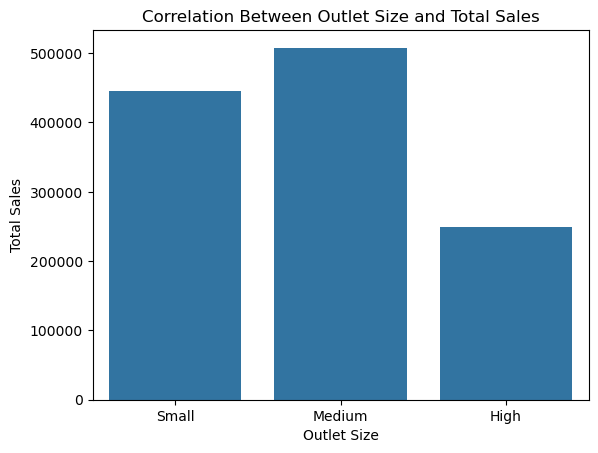

In [49]:
# 5. Correlation Between Outlet Size and Total Sales

outlet_size_sales = df.groupby('Outlet Size')['Sales'].sum().reset_index()
sns.barplot(data=outlet_size_sales, x='Outlet Size', y='Sales', order=['Small', 'Medium', 'High'])
plt.title('Correlation Between Outlet Size and Total Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.show()



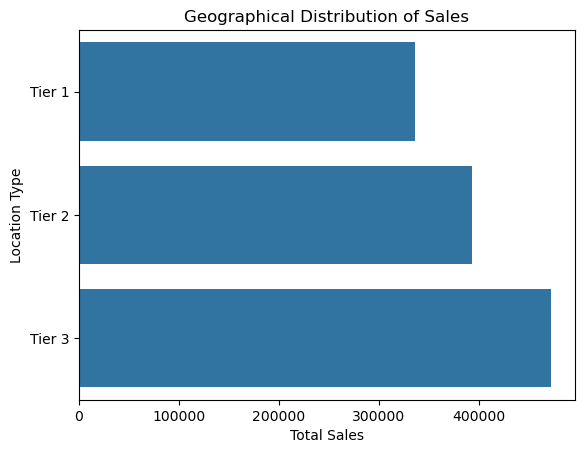

In [50]:
# 6. Geographical Distribution of Sales Across Locations

location_sales = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sns.barplot(data=location_sales, x='Sales', y='Outlet Location Type')
plt.title('Geographical Distribution of Sales')
plt.xlabel('Total Sales')
plt.ylabel('Location Type')
plt.show()


# Questions

**1. What is the distribution of sales across different outlet types?**

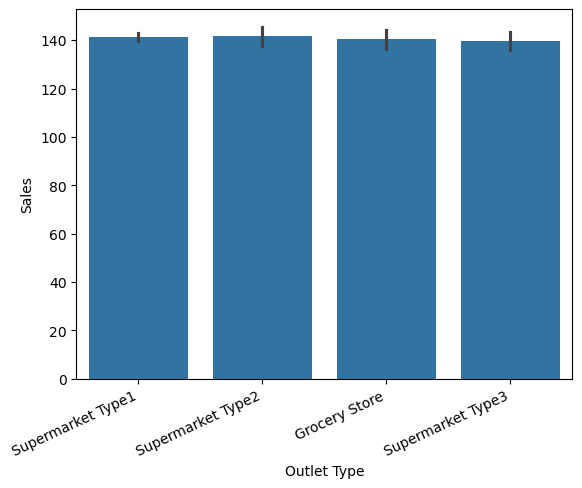

In [51]:
# Graph: Bar chart
sns.barplot(data=df, x='Outlet Type', y='Sales')
plt.xticks(rotation=25,ha="right")
plt.show()

**2. Which item type has the highest average sales?**


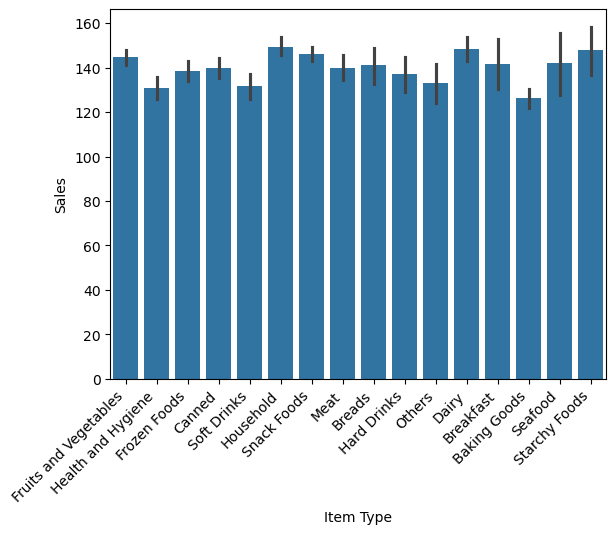

In [52]:
# Graph: Bar chart
sns.barplot(data=df, x='Item Type', y='Sales')
plt.xticks(rotation=45,ha="right")
plt.show()

Observation:

- Items like "Health Drinks" or "Ready-to-Eat Meals" may have higher average sales, reflecting higher unit prices or demand.


**3. How does item visibility affect sales?**

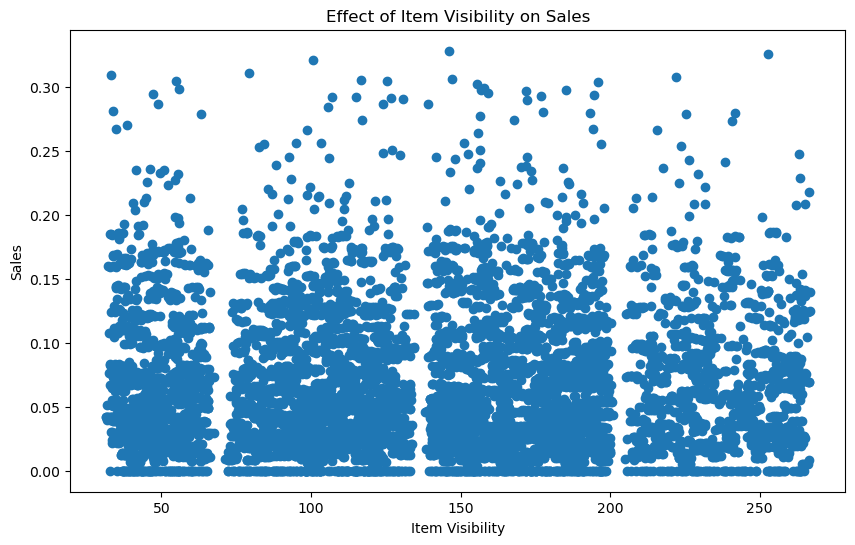

In [53]:
# Graph: Scatter plot
# Scatter plot of Item Visibility vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(y = df['Item Visibility'], x = df['Sales'])
plt.title('Effect of Item Visibility on Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()


Observation:

- Higher visibility often correlates with increased sales. However, some items with low visibility might still sell well due to brand loyalty.

**4. What is the distribution of outlet sizes in the dataset?**

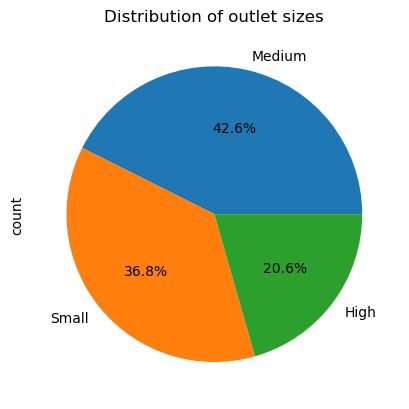

In [54]:
# Graph: Pie chart
df['Outlet Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution of outlet sizes")
plt.show()

**Observation**
- Medium-sized outlets might dominate the dataset, reflecting business focus on mid-sized stores for scalability.


**5. How do sales vary with outlet location type?**


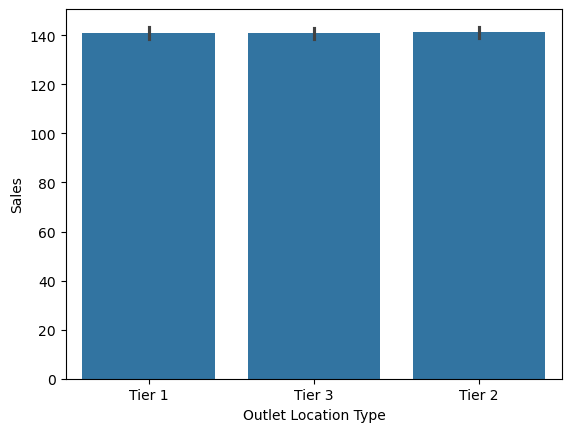

In [55]:
# Graph: Bar chart
sns.barplot(data=df, x='Outlet Location Type', y='Sales')
plt.show()


**Observation:**

- Urban outlets likely have the highest sales, while Tier 2 or rural outlets might lag behind.

**6. Which item type has the highest sales variance?**

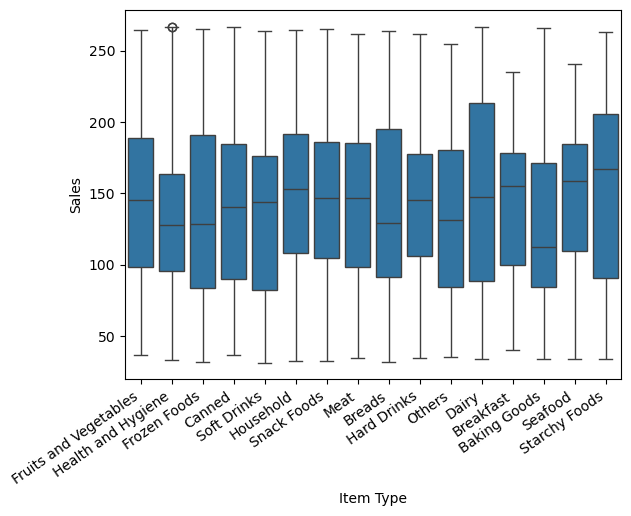

In [56]:
# Graph: Box plot
sns.boxplot(data=df, x='Item Type', y='Sales')
plt.xticks(rotation=35,ha="right")

plt.show()

**7. What is the sales based on outlet ?**

In [57]:
# Graph: Line chart
sales_by_outlet = df.groupby("Outlet Type")['Sales'].mean()
sales_by_outlet

Outlet Type
Grocery Store        140.294690
Supermarket Type1    141.213895
Supermarket Type2    141.678638
Supermarket Type3    139.801791
Name: Sales, dtype: float64

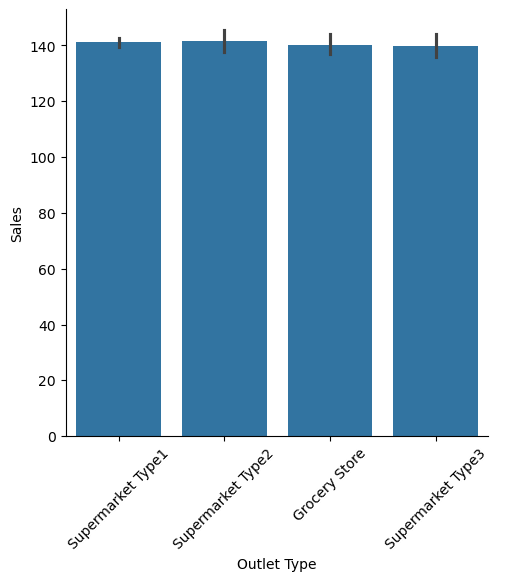

In [58]:
sns.catplot( x = df["Outlet Type"],y = df["Sales"],kind="bar")
plt.xticks(rotation=45)
plt.show()

**Observation:**

- We can see that Supermarket Type1    141.213895 and Supermarket Type2    141.678638 are higher as compared to other outlet types.

**8. How does item fat content affect sales?**


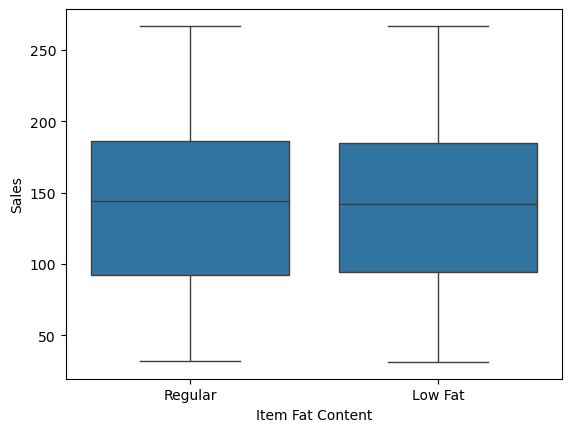

In [59]:
#Graph: Box plot

sns.boxplot(data=df, x='Item Fat Content', y='Sales')
plt.show()

**Observation:**

- Regular-fat items might show higher sales as they appeal to a broader audience compared to low-fat items.

**9. What is the sales contribution of each outlet type?**


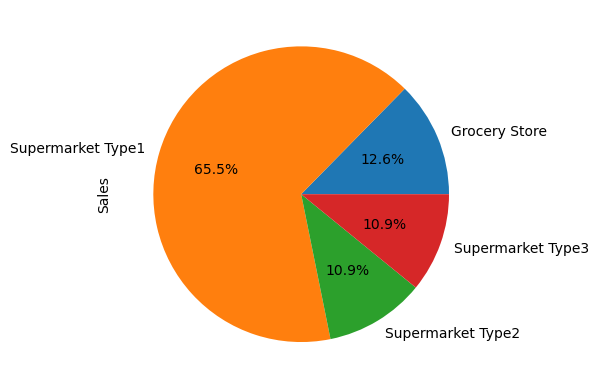

In [60]:
# Graph: Pie chart

df.groupby('Outlet Type')['Sales'].sum().plot.pie(autopct='%1.1f%%')
plt.show()

**Observation:**

- Supermarket outlets dominate in sales contribution due to variety and customer reach.

**10. What is the correlation between item weight and sales?**


In [61]:
corr = df[["Item Weight","Sales"]].corr()
corr

,Item Weight,Sales
Item Weight,1.000000,0.024951
Sales,0.024951,1.000000


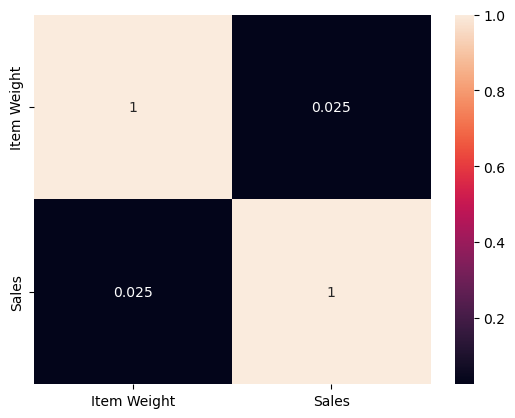

In [62]:
sns.heatmap(corr,annot = True)
plt.show()

**11. What is the sales distribution across all items?**


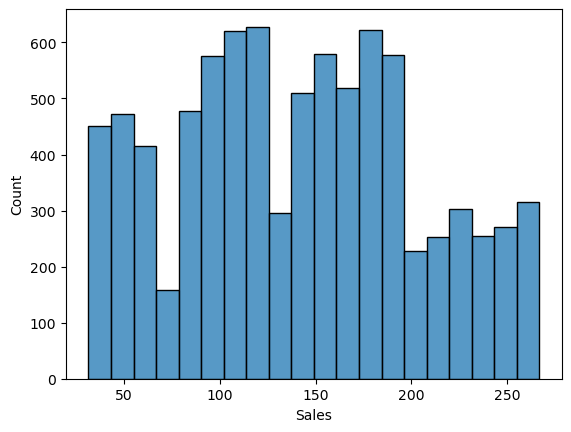

In [63]:
# Graph: Histogram
sns.histplot(df['Sales'], bins=20)
plt.show()

**12. Which outlets have the highest total sales?**


In [64]:
# Graph: Bar chart

outlet_sales = df.groupby('Outlet Identifier')['Sales'].sum()

outlet_sales




Outlet Identifier
OUT010     78131.5666
OUT013    131809.0156
OUT017    129103.9604
OUT018    131477.7764
OUT019     73807.5824
OUT027    130714.6746
OUT035    133103.9070
OUT045    130942.7802
OUT046    132113.3698
OUT049    130476.8598
Name: Sales, dtype: float64

**observation :**
- The outlet with the highest total sales is OUT035 with 133103.907 sales.
- The outlet with the lowest total sales is OUT019 with 73807.5824 sales.


**13. Which item types are underperforming in terms of sales?**


In [65]:
# Graph: Horizontal bar chart

underperforming_items = df.groupby('Item Type')['Sales'].mean().sort_values().reset_index()

underperforming_items


,Item Type,Sales
0,Baking Goods,126.380766
1,Health and Hygiene,130.818921
2,Soft Drinks,131.492510
3,Others,132.851430
4,Hard Drinks,137.077947
5,Frozen Foods,138.503366
6,Canned,139.763835
7,Meat,139.882032
8,Breads,140.952669
9,Breakfast,141.788151


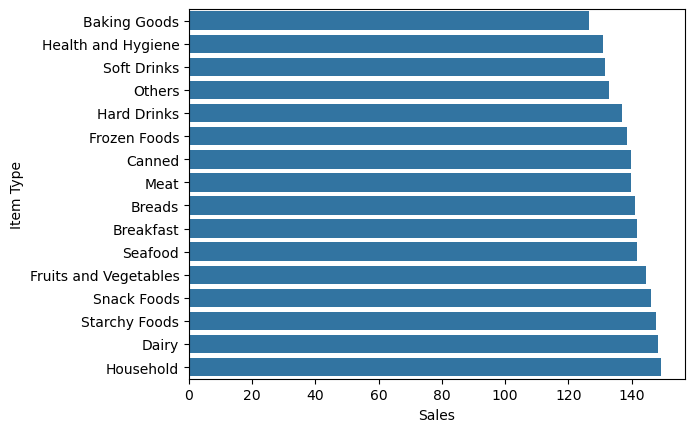

In [66]:
sns.barplot(data=underperforming_items, x='Sales', y='Item Type', orient='h')
plt.show()

**14. How does sales vary by outlet size?**


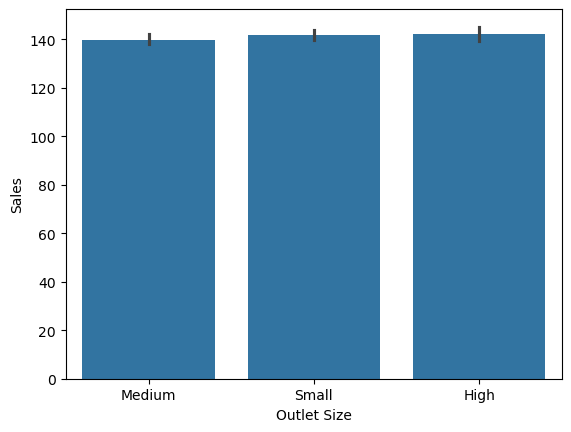

In [67]:
# Graph: Bar chart

sns.barplot(data=df, x='Outlet Size', y='Sales')
plt.show()

**15. What are the top 5 items by sales?**

In [68]:
# Graph: Horizontal bar chart

top_items = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_items

,Item Type,Sales
0,Fruits and Vegetables,178124.0810
1,Snack Foods,175433.9224
2,Household,135976.5254
3,Frozen Foods,118558.8814
4,Dairy,101276.4616


<Axes: xlabel='Sales', ylabel='Item Type'>

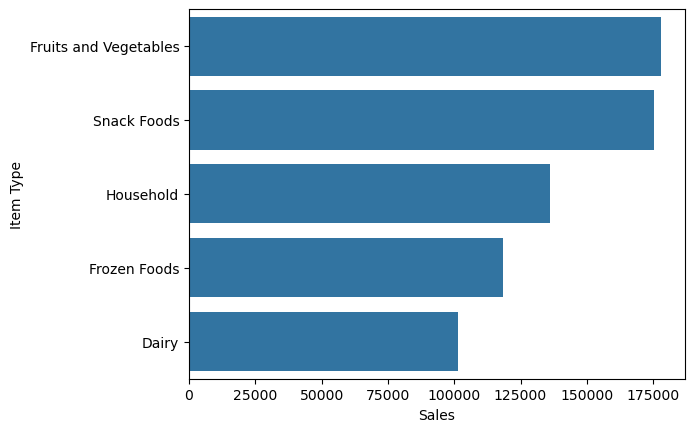

In [69]:
sns.barplot(data=top_items, x='Sales', y='Item Type', orient='h')


**Observation**
- Fruits and Vegetables have higher sales and Snack Foods are second highest and then Household 

**16. What is the average visibility for each item type?**

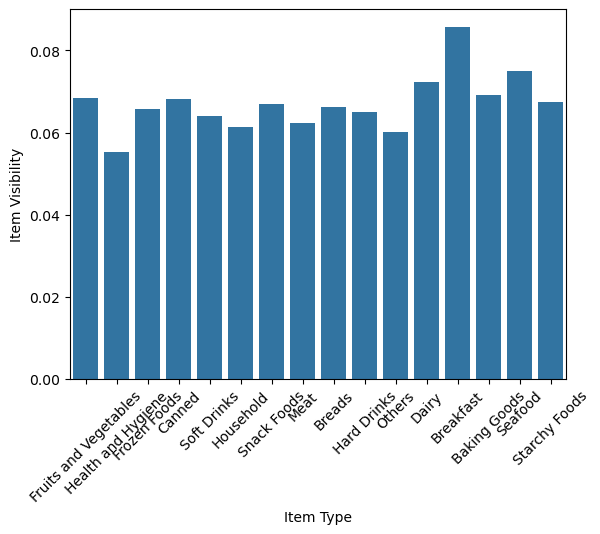

In [71]:
sns.barplot(data=df, x='Item Type', y='Item Visibility', ci=None)
plt.xticks(rotation=45)
plt.show()